In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
%matplotlib inline

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
range = pd.date_range('2015-01-01', '2015-12-31', freq='15min')
df = pd.DataFrame(index=range)
df['speed'] = np.random.randint(low=0, high=60, size=len(df.index))
df['distance'] = df['speed'] * 0.25
df['cumulative_distance'] = df.distance.cumsum()

In [5]:
df.head()

,speed,distance,cumulative_distance
2015-01-01 00:00:00,45,11.25,11.25
2015-01-01 00:15:00,26,6.50,17.75
2015-01-01 00:30:00,47,11.75,29.50
2015-01-01 00:45:00,17,4.25,33.75
2015-01-01 01:00:00,15,3.75,37.50


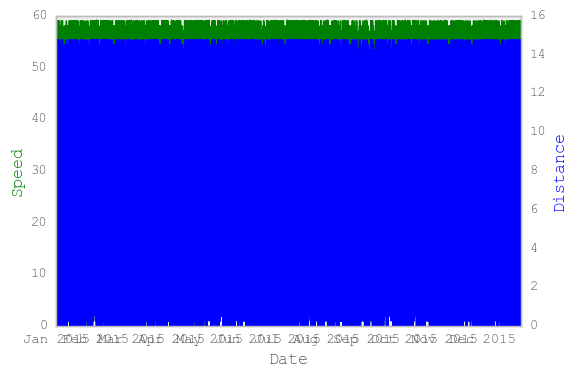

In [6]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.index, df['speed'], 'g-')
ax2.plot(df.index, df['distance'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Speed', color='g')
ax2.set_ylabel('Distance', color='b')

plt.show()
plt.rcParams['figure.figsize'] = 13,5

In [19]:
weekly_summary = pd.DataFrame()
weekly_summary['speed'] = df.speed.resample('W').mean()
weekly_summary['distance'] = df.distance.resample('W').sum()
weekly_summary['cumulative_distance'] = df.cumulative_distance.resample('W').last()

weekly_summary = weekly_summary.truncate(before='2015-01-05', after='2015-12-27')
weekly_summary.head()

,speed,distance,cumulative_distance
2015-01-11,28.702381,4822.00,7560.75
2015-01-18,29.653274,4981.75,12542.50
2015-01-25,30.038690,5046.50,17589.00
2015-02-01,29.486607,4953.75,22542.75
2015-02-08,30.465774,5118.25,27661.00


In [20]:
weekly_summary

,speed,distance,cumulative_distance
2015-01-11,28.702381,4822.00,7560.75
2015-01-18,29.653274,4981.75,12542.50
2015-01-25,30.038690,5046.50,17589.00
2015-02-01,29.486607,4953.75,22542.75
2015-02-08,30.465774,5118.25,27661.00
2015-02-15,29.638393,4979.25,32640.25
2015-02-22,30.193452,5072.50,37712.75
2015-03-01,28.885417,4852.75,42565.50
2015-03-08,29.483631,4953.25,47518.75
2015-03-15,30.041667,5047.00,52565.75


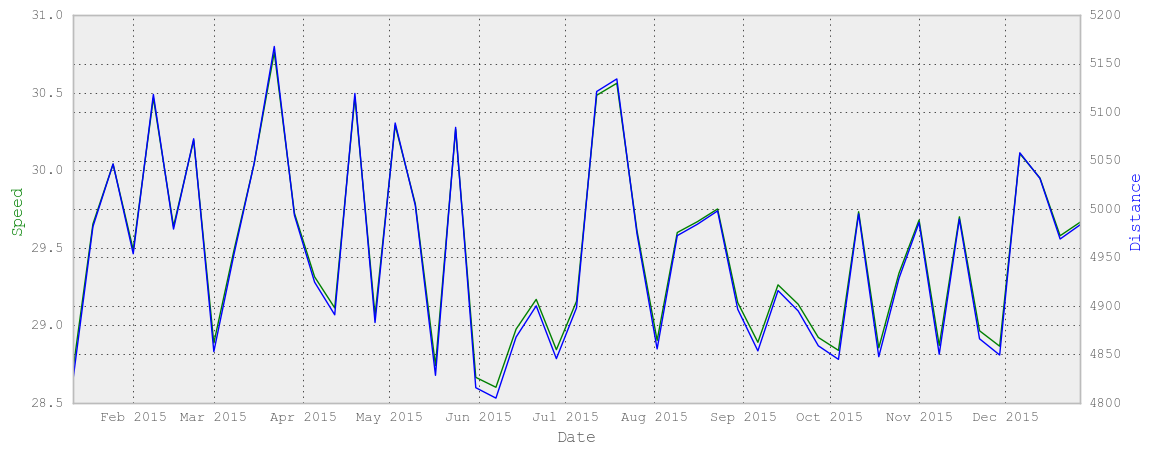

In [22]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(weekly_summary.index, weekly_summary['speed'], 'g-')
ax2.plot(weekly_summary.index, weekly_summary['distance'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Speed', color='g')
ax2.set_ylabel('Distance', color='b')

plt.show()
plt.rcParams['figure.figsize'] = 13, 5

In [23]:
annual_summary = pd.DataFrame()
annual_summary['speed'] = df.speed.resample('AS').mean()
annual_summary['distance'] = df.speed.resample('AS').sum()
annual_summary['cumulative_distance'] = df.cumulative_distance.resample('AS').last()
annual_summary

,speed,distance,cumulative_distance
2015-01-01,29.473372,1029947,257486.75
